# Visualizing your library's guide distribution

The data used for this visualization comes from the control library published with the following preprint: [Human sialomucin CD164 is an essential entry factor for lymphocytic choriomeningitis virus](https://www.biorxiv.org/content/10.1101/2022.01.24.477570v1). Data is available on NCBI BioProjects under accession ID PRJNA806912.

## Getting Started
So you just sequenced your library, whether this is your original guide library sequenced at ~100x to verify coverage, or your actual experiment which is sequenced at ~1000x for you to look at enrichment or depletion of guides following a perturbation. Congrats! Chances are you just spent a lot of your/your PI's grant money and are a little stressed about whether or not your experiment even worked technically (let alone have a biological signal to study). No worries! Follow along to visualize your library's guide distribution.

To start, you should have the following:
* A comma separated values file (CSV) or a tab separated values file (TSV) that lists out three columns: the sgRNA name, the gene it targets, and the count for that guide. This is commonly the output of the [MAGeCK](https://sourceforge.net/p/mageck/wiki/Home/) count function.
* You should know the path to the file above. For example, if you placed it on your Desktop, it is most likely a variation of "/Users/\<username\>/Desktop/\<filename.csv\>"

In [1]:
# Import necessary libraries for working with math, dataframes, and plotting for visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import your counts file as a dataframe
# Edit the following import commands to the location of your file of interest
# If you have a CSV file, run:
myLibrary = pd.read_csv('/PATH/TO/FILE/visualizing-distribution-count.txt', sep=',')

# If you have a TSV file, run:
myLibrary = pd.read_csv('/PATH/TO/FILE/visualizing-distribution-count.txt', sep='\t')


Notice the difference between the two import commands. The sep value is a ',' or a comma for a CSV file and a '/t' or a tab for a TSV file.

In [3]:
# Look at your imported file. Change the number in the head to look at more or fewer lines.
myLibrary.head(5)

,sgRNA,Gene,Reads
0,HGLibA_29438,MLX,469
1,HGLibA_12853,DEFB113,2834
2,HGLibA_18159,FUCA2,1711
3,HGLibA_42563,S100A6,485
4,HGLibA_42697,SAMD9,2067


In [4]:
# You can also look at the end of the imported file.
myLibrary.tail(5)

,sgRNA,Gene,Reads
63945,HGLibA_63790,hsa-mir-7107,0
63946,HGLibA_63921,hsa-mir-7641-2,0
63947,HGLibA_64080,hsa-mir-8060,0
63948,HGLibA_64186,hsa-mir-8086,0
63949,HGLibA_64297,hsa-mir-92b,0


You can also verify that everything looks right by comparing the file as it appears here with how it looks when you open it with Excel or a text editor. Do not do this if you are doing a whole-genome screen though. You will have too many lines to look at and may cause Excel to crash.

We notice that there are a lot of zeroes at the end of this file. These zeros will cause problems later on, so let us first deal with these by making a note of how many guides have zero counts, and removing them from our dataframe.

In [5]:
# Print how many rows have zero reads
zero_reads = sum((myLibrary == 0).any(axis=1))
print("In this library, there are", zero_reads, "guides with zero reads")

# Remove the rows with zero reads
myLibrary = myLibrary[~(myLibrary == 0).any(axis=1)]

In this library, there are 303 guides with zero reads


## Plotting a histogram
Now let us plot your guide distribution with a histogram. We would expect to see somewhat of a normal distribution if we had not selected our guides in any way (i.e. control sample or original guide library).

We imagine that we would want a plot that has the number of reads or counts on the x-axis, and the number of guides that were sequenced to that depth on the y-axis. To do this, we can start with the basic histogram plot.

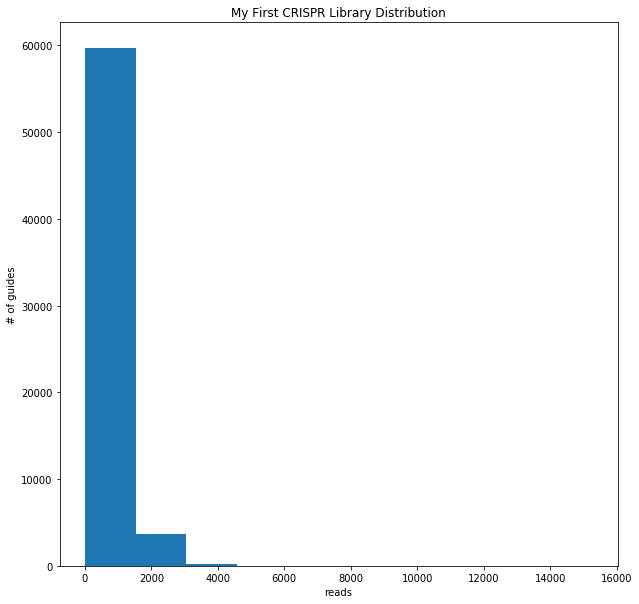

In [6]:
# Set up the figure
fig, axs = plt.subplots(1,1,figsize=(10,10))

# Plot a histogram
axs.hist(myLibrary['Reads'])

# Set up the labels for the figure
axs.title.set_text('My First CRISPR Library Distribution')
axs.set_xlabel('reads')
axs.set_ylabel('# of guides')

plt.show()

So things don't look quite right. It seems that we have a lots of guides that have very few reads, and very few guides with many reads. And, all togther, we have a plot that looks nothing like a normal distribution. Now we know that our library was prepared using PCR, which amplifies our guides exponentially by powers of 2. Thus, we really should be plotting on x-axis on a log scale instead.

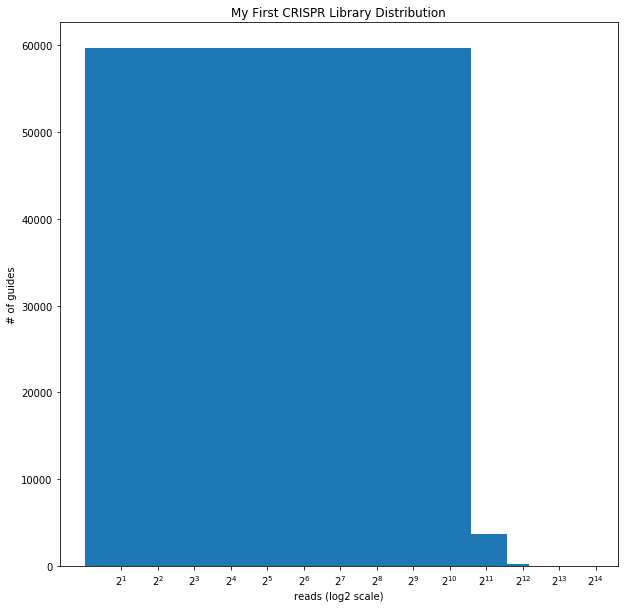

In [7]:
# Set up the figure
fig, axs = plt.subplots(1,1,figsize=(10,10))

# Set x-axis to a log scale with base 2
axs.set_xscale('symlog', basex=2)

# Plot a histogram
axs.hist(myLibrary['Reads'])

# Set up the labels for the figure
axs.title.set_text('My First CRISPR Library Distribution')
axs.set_xlabel('reads (log2 scale)')
axs.set_ylabel('# of guides')

plt.show()

Now clearly we do not have the correct scaling for the bins that we need in order to gain relevant insight to how well distributed our guides are. We can try out a few different values of the 'bins' option when plotting this histogram to see if anything changes.

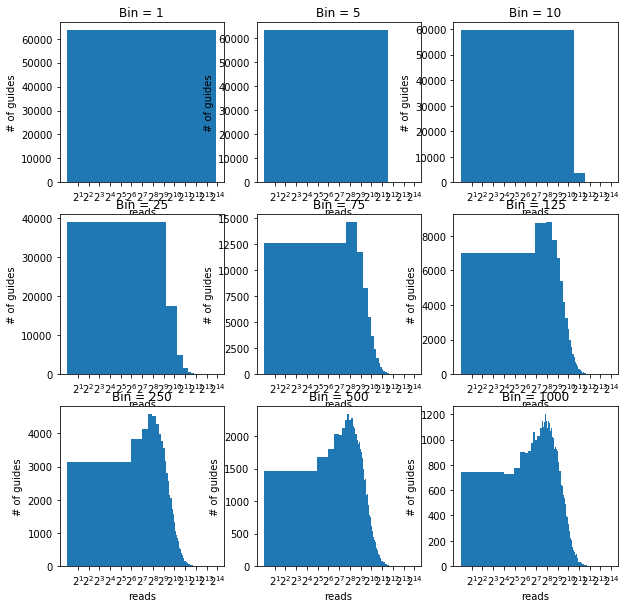

In [8]:
fig, axs = plt.subplots(3,3,figsize=(10,10))
bins_list = [1, 5, 10, 25, 75, 125, 250, 500, 1000]
for i in range(0,len(axs.flat)):    
    axs.flat[i].set_xscale('symlog', basex=2)
    hist, bins = np.histogram(myLibrary['Reads'])
    axs.flat[i].hist(myLibrary['Reads'], bins=bins_list[i])

    axs.flat[i].title.set_text('Bin = ' + str(bins_list[i]))
    axs.flat[i].set_xlabel('reads')
    axs.flat[i].set_ylabel('# of guides')

plt.show()

It is clear that although we have stated that the x-axis should be in the 'symlog' scale, the way bins are distributed using the histogram plotting function is still linear. As such we see that when we increase the number of bins, we have greater granularity on the right side of the x-axis, but the left side remains a giant block. 

To correct this, we must re-make the bins in log scale.

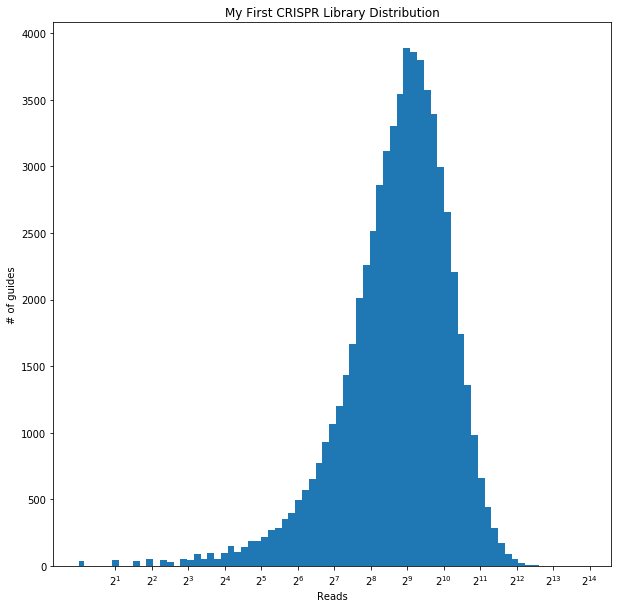

In [9]:
fig, axs = plt.subplots(1,1,figsize=(10,10))
axs.set_xscale('symlog', basex=2)
hist, bins = np.histogram(myLibrary['Reads'], bins = 75)

# Make my log bins
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))

# Plot the bins as logbins
axs.hist(myLibrary['Reads'], bins=logbins)

# Set up the labels for the figure
axs.title.set_text('My First CRISPR Library Distribution')
axs.set_xlabel('Reads')
axs.set_ylabel('# of guides')

plt.show()

Nice! This is what we want. Now to evaluate how well distributed our library is, we need to do some calculations. General rule of thumb is as follows:

* Your median library read number should be close to the targeted library depth that you had sequenced at
* Calculate your 5th percentile and 95th percentile
* You want the majority of your reads to be within a 4-fold range of the median
 
In addition to doing the calulations, let us also plot all these different metrics on our figure itself.

In [10]:
# Find the median of the library distribution
my_library_median = myLibrary['Reads'].median()
print("The median of this library is", my_library_median, "reads")

# Find the acceptable range of library distribution
print("The desired library distribution ramge is from", my_library_median/4, "to",
      my_library_median*4, "reads")

# Find the 95th percentile of the library distribution
my_library_95 = np.nanpercentile(myLibrary['Reads'], 95)
print("The 95th percentile of this library is", my_library_95, "reads")

# Find the 5th percentile of the library distribution
my_library_5 = np.nanpercentile(myLibrary['Reads'], 5)
print("The 5th of this library is", my_library_5, "reads")

The median of this library is 482.0 reads
The desired library distribution ramge is from 120.5 to 1928.0 reads
The 95th percentile of this library is 1640.0 reads
The 5th of this library is 63.0 reads


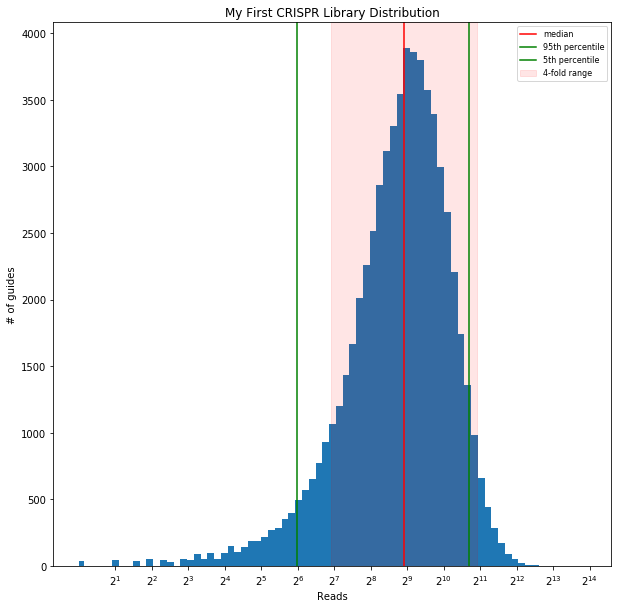

In [11]:
fig, axs = plt.subplots(1,1,figsize=(10,10))
axs.set_xscale('symlog', basex=2)
hist, bins = np.histogram(myLibrary['Reads'], bins = 75)

# Make my log bins
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))

# Plot the bins as logbins
axs.hist(myLibrary['Reads'], bins=logbins)

## Plot our metrics
# Plot the median
axs.axvline(x=my_library_median, color='red', label='median')
# Plot the theoretical coverage, if you know what that is
#axs.axvline(x=Seq_coverage, color='red', linestyle='--', alpha=0.8, label='Seq coverage')
# Plot the 4-fold range of library distribution
axs.axvspan(xmin=my_library_median/4,
                        xmax=my_library_median*4,
                        alpha=0.1, color='red', label='4-fold range')
# Plot the 95th percentile
axs.axvline(x=my_library_95, color='green', label='95th percentile')
# Plot the 5th percentile
axs.axvline(x=my_library_5, color='green', label='5th percentile')

# Set up the labels for the figure
axs.title.set_text('My First CRISPR Library Distribution')
axs.set_xlabel('Reads')
axs.set_ylabel('# of guides')

# Add a legend
axs.legend(prop={'size': 8})

plt.show()

We can even count how many guides are outside of our preferred guide library distribution and summarize what we have learned so far:

In [12]:
print('Number of guides with no reads:', zero_reads)
print('Number of guides under 4x median:', str(sum(myLibrary['Reads']<my_library_median/4)))
print('Number of guides over 4x median:', str(sum(myLibrary['Reads']>my_library_median*4)))

Number of guides with no reads: 303
Number of guides under 4x median: 6789
Number of guides over 4x median: 1836


## Summary

Hopefully your library looks great, and you are ready to start your screen or proceed to data analysis. If your library looks absolutely abyssmal, it is time to troubleshoot. Perhaps there were some unintened bottleneck that has occurred during the cloning or lentivirus packaging process. There could also be an issue with the genomic PCR. In any case, now you know how to QC your library distribution.

Once again, you can find the original data used for this visualization on NCBI BioProjects under accession ID PRJNA806912.

## Acknowledgements

This tutorial is dedicated to Connor. You're welcome.